# This is the notebook 

## Loading the libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Load Each Dataset

In [2]:
df_train = pd.read_csv("../Data/mitbih_train.csv", header=None)
df_test = pd.read_csv("../Data/mitbih_test.csv", header=None)

## Check the Dimension of the Set

In [3]:
print(df_train.shape)
print(df_test.shape)

(87554, 188)
(21892, 188)


## Chech the first few row of each dataset

In [4]:
print(df_train.head())
print(df_test.head())

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

## Distribution of labels

In [5]:
print(df_train.iloc[:, -1].value_counts())
print(df_test.iloc[:,-1].value_counts())

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64
187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


## Combine the train and test set

In [6]:
df_combined = pd.concat([df_train, df_test])

## Distribution of labels

In [7]:
print(df_combined.iloc[:,-1].value_counts())

187
0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: count, dtype: int64


## Basic Statistical Analysis:

In [8]:
overall_stats = df_combined.iloc[:, :-1].describe()

print("Statistical Measures for the Entire Dataset:")
print(overall_stats)

# check for missing values
missing_values = df_combined.isnull().sum()
print("\nMissing values in each colmn:")
print(missing_values[missing_values >0])

Statistical Measures for the Entire Dataset:
                 0              1              2              3    \
count  109446.000000  109446.000000  109446.000000  109446.000000   
mean        0.891170       0.758909       0.424503       0.219602   
std         0.239657       0.221190       0.227561       0.207248   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.922252       0.682648       0.251014       0.048853   
50%         0.991202       0.826560       0.430174       0.166355   
75%         1.000000       0.910868       0.579832       0.342707   
max         1.000000       1.000000       1.000000       1.000000   

                 4              5              6              7    \
count  109446.000000  109446.000000  109446.000000  109446.000000   
mean        0.201237       0.210298       0.205607       0.201617   
std         0.177191       0.171965       0.178374       0.177020   
min         0.000000       0.000000       0.000000       

## Class Distribution:

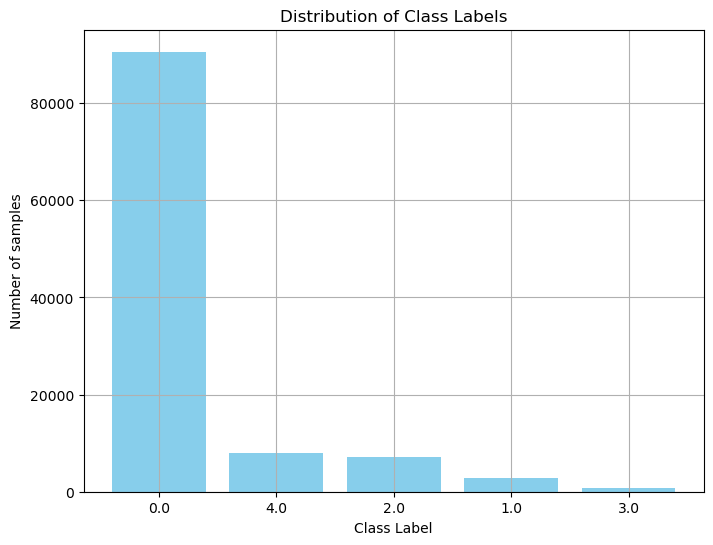

In [9]:
import matplotlib.pyplot as plt

label_distribution = df_combined.iloc[:,-1].value_counts()

plt.figure(figsize=(8,6))
plt.bar(label_distribution.index.astype(str), label_distribution.values, color = 'skyblue')
plt.xlabel("Class Label")
plt.ylabel("Number of samples")
plt.title("Distribution of Class Labels")
plt.grid(True)
plt.show()

## Visualization of Time Series for Each Class: 

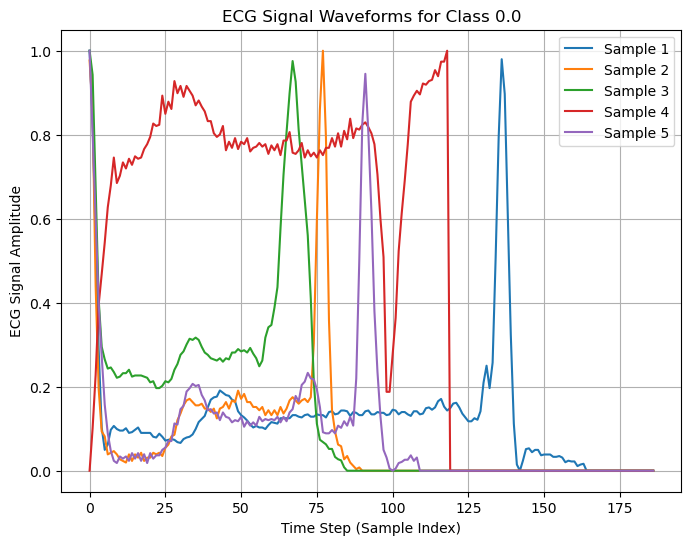

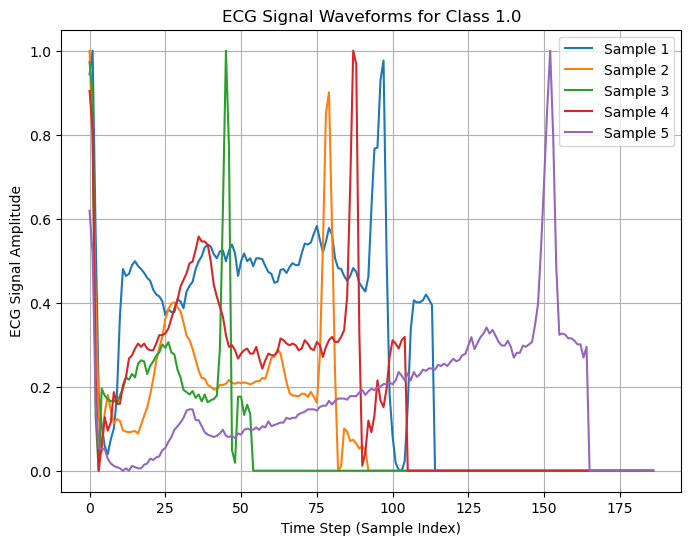

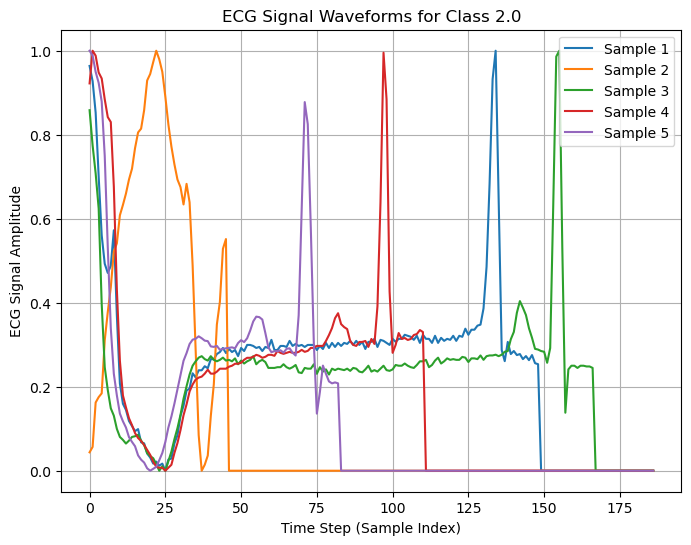

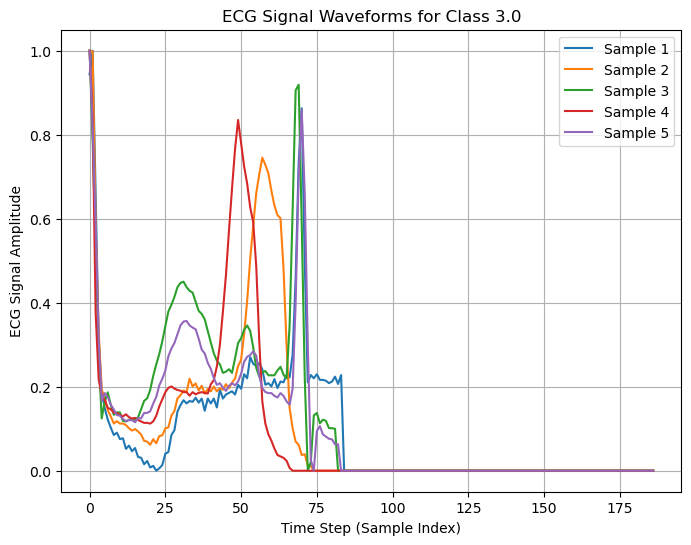

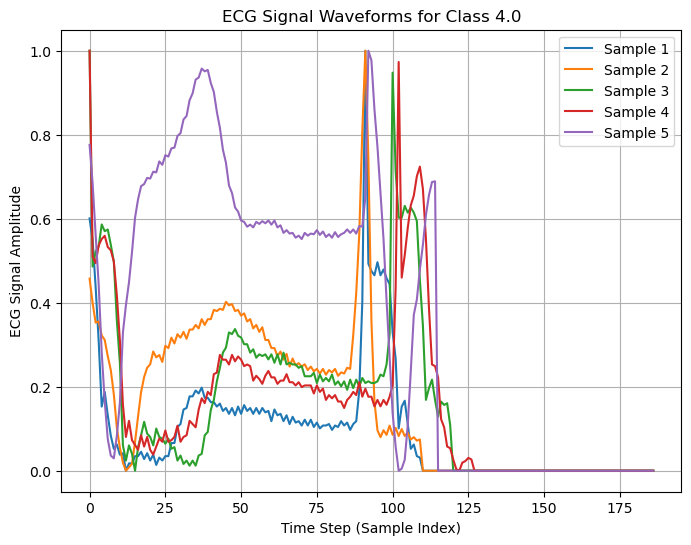

In [10]:
# Plot random samples from each class
for label in df_combined.iloc[:, -1].unique():
    plt.figure(figsize=(8, 6))
    sample_signals = df_combined[df_combined.iloc[:, -1] == label].iloc[:, :-1].sample(5, random_state=42)
    
    for i, signal in enumerate(sample_signals.values):
        plt.plot(signal, label=f"Sample {i+1}")
    
    plt.xlabel('Time Step (Sample Index)')
    plt.ylabel('ECG Signal Amplitude')
    plt.title(f'ECG Signal Waveforms for Class {label}')
    plt.legend()
    plt.grid(True)
    plt.show()

## Featrure Analysis: 

In [11]:
# Box plots for feature-wise distribution across all samples
# plt.figure(figsize=(15, 8))
# plt.boxplot(df_combined.iloc[:, :-1].values.T, widths=0.6, showfliers=False)
# plt.title('Distribution of ECG Signal Values Across 188 Features')
# plt.xlabel('Feature Index (Time Step)')
# plt.ylabel('ECG Signal Value')
# plt.xticks(rotation=90)
# plt.grid(True)
# plt.show()

## Time Series Characteristics:

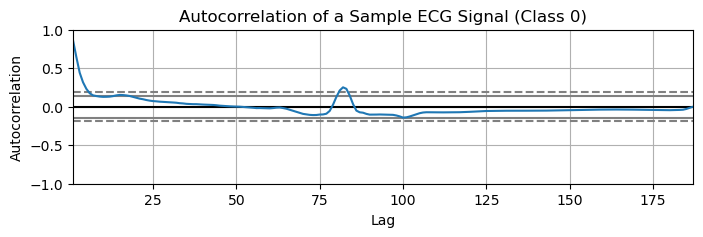

In [12]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation for a sample ECG signal from class 0
sample_signal = df_combined[df_combined.iloc[:,-1] == 0] .iloc[0,:-1]

plt.figure(figsize=(8,2))
autocorrelation_plot(sample_signal)
plt.title('Autocorrelation of a Sample ECG Signal (Class 0)')
plt.show()

## Frequency Domain Analysis: 

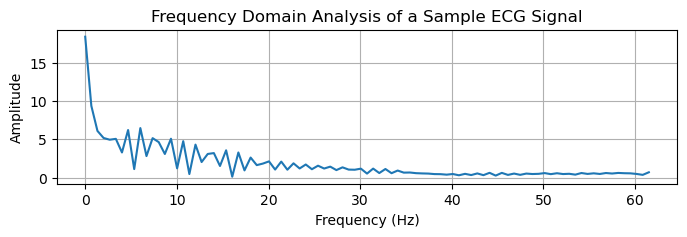

In [13]:
import numpy as np

# FFT of a sample ECG signal
sample_signal = df_combined.iloc[0, :-1]

# Perform FFT
fft_values = np.fft.fft(sample_signal)
fft_freq = np.fft.fftfreq(len(sample_signal), d=1/125)  # Assuming 125 Hz sampling rate

# Plot the FFT results
plt.figure(figsize=(8, 2))
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Analysis of a Sample ECG Signal')
plt.grid(True)
plt.show()

## Feature Engineering for Time Series Data: 

In [14]:
# Add statistical features for each sample
df_features = df_combined.copy()

df_features['mean'] = df_combined.iloc[:, :-1].mean(axis=1)
df_features['std'] = df_combined.iloc[:, :-1].std(axis=1)
df_features['min'] = df_combined.iloc[:, :-1].min(axis=1)
df_features['max'] = df_combined.iloc[:, :-1].max(axis=1)
df_features['median'] = df_combined.iloc[:, :-1].median(axis=1)
df_features['iqr'] = df_combined.iloc[:, :-1].quantile(0.75, axis=1) - df_combined.iloc[:, :-1].quantile(0.25, axis=1)


## Time-domain Features:

In [15]:
from scipy.stats import skew, kurtosis

df_features['zero_crossings'] = df_combined.iloc[:, :-1].apply(lambda x: np.sum(np.diff(np.sign(x)) != 0), axis=1)
df_features['skewness'] = df_combined.iloc[:, :-1].apply(lambda x: skew(x), axis=1)
df_features['kurtosis'] = df_combined.iloc[:, :-1].apply(lambda x: kurtosis(x), axis=1)


## Frequency-Domain Features:

In [16]:
# Add frequency domain features
def fft_features(row):
    fft_vals = np.fft.fft(row)
    fft_mag = np.abs(fft_vals)
    return np.mean(fft_mag), np.std(fft_mag), np.max(fft_mag)

df_features[['fft_mean', 'fft_std', 'fft_max']] = df_combined.iloc[:, :-1].apply(lambda row: fft_features(row), axis=1, result_type='expand')


## Plot T-sne and PCA:

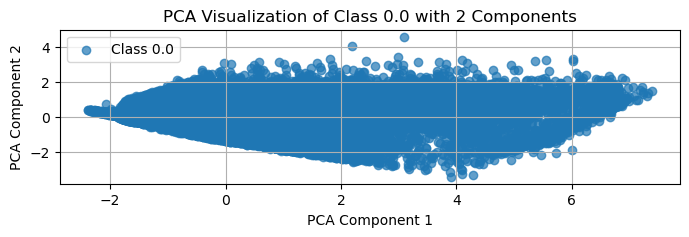

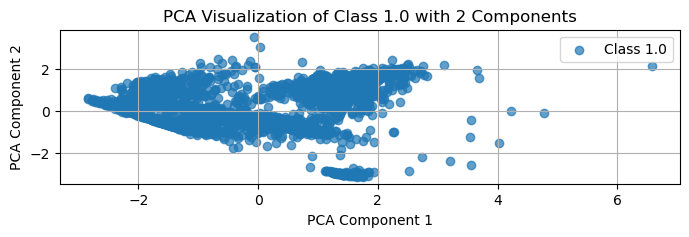

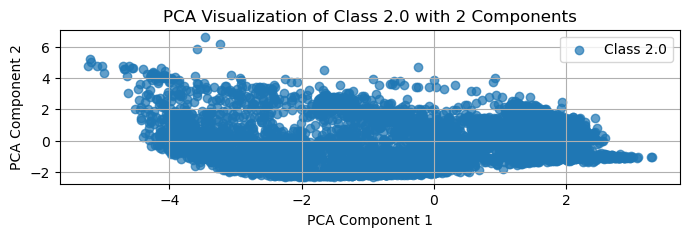

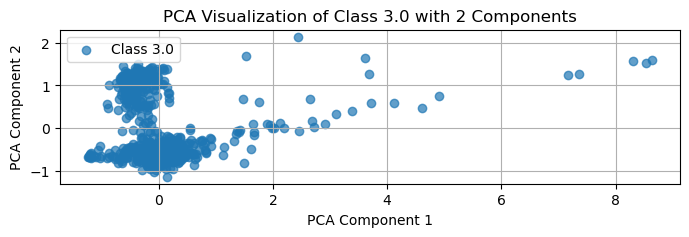

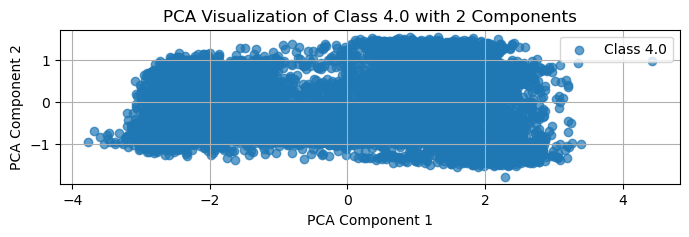

In [17]:
import os
sys.path.append(os.path.abspath('../src'))

from dimensionality_reduction import DimensionalityReductionVisualization
# Initialize the visualization class with the label column as the last column
# Define a custom component map for each class
n_components_map = {
    3: 2,  # Class 3 with 3 components
    1: 2,  # Class 1 with 2 components
    2: 2,   # Class 2 with 4 components (optional example)
    4: 2,
    0: 2
}
viz = DimensionalityReductionVisualization(label_column=df_combined.columns[-1])

# Plot PCA visualization for all classes individually
viz.plot_all_classes(df_combined, method='pca', n_components_map=n_components_map)

# Plot t-SNE visualization for all classes individually
#viz.plot_all_classes(df_combined, method='tsne', n_components_map=n_components_map)
#viz.plot_tsne(df_combined, target_class=3, n_components=2)


## t-sne: 

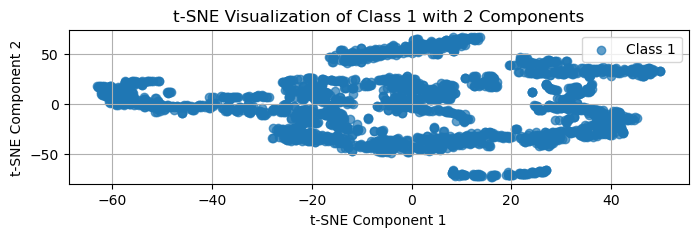

In [18]:
viz.plot_tsne(df_combined, target_class=1, n_components=2)

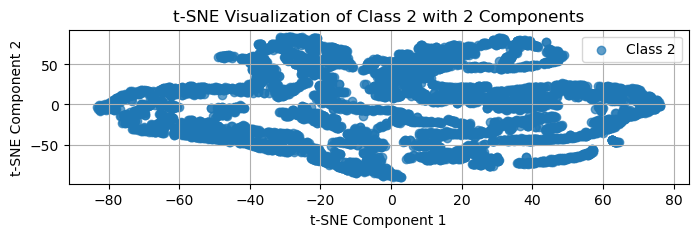

In [19]:
viz.plot_tsne(df_combined, target_class=2, n_components=2)

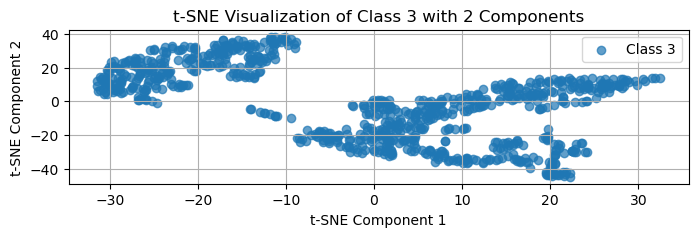

In [20]:
viz.plot_tsne(df_combined, target_class=3, n_components=2)

## Seperate Train, test and hold-out set

In [21]:
import pandas as pd

def stratified_sample(df: pd.DataFrame, percentage: float, label_col_index: int = -1) -> (pd.DataFrame, pd.DataFrame):
    """
    Perform stratified sampling on a DataFrame without headers, ensuring equal representation of each label.

    Args:
        df (pd.DataFrame): The input DataFrame (no header assumed).
        percentage (float): The percentage of samples to select.
        label_col_index (int): The index of the label column (default is the last column).

    Returns:
        (pd.DataFrame, pd.DataFrame): Sampled and remaining DataFrames.
    """
    # Calculate the total number of samples needed
    total_samples = int(len(df) * (percentage / 100))
    
    # Determine the unique labels and samples per label
    labels = df.iloc[:, label_col_index].unique()  # Specify label column by index
    samples_per_label = total_samples // len(labels)
    
    # Perform stratified sampling
    sampled_dfs = []
    for label in labels:
        label_df = df[df.iloc[:, label_col_index] == label]
        
        # Handle cases where samples_per_label might be greater than available samples
        if len(label_df) < samples_per_label:
            raise ValueError(f"Not enough samples for label {label} to fulfill stratified sampling.")
        
        sampled_label_df = label_df.sample(n=samples_per_label, random_state=42)
        sampled_dfs.append(sampled_label_df)
    
    # Concatenate sampled data and shuffle
    sampled_df = pd.concat(sampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Get the remaining data by dropping the sampled indices
    remaining_df = df.drop(sampled_df.index).reset_index(drop=True)
    
    return sampled_df, remaining_df


In [22]:
df_test_holdout , df_train = stratified_sample(df_combined, 0.3)

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_test_holdout = df_test_holdout.iloc[:, :-1]
y_test_holdout = df_test_holdout.iloc[:,-1]


# X_holdout = X_holdout.reset_index(drop=True)
# y_holdout = y_holdout.reset_index(drop=True)


X_test, X_holdout, y_test, y_holdout = train_test_split(X_test_holdout, y_test_holdout , test_size=0.5, random_state=42, stratify=y_test_holdout)


In [23]:
df_combined.head(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#%% Split the Dataset:

# from sklearn.model_selection import train_test_split

# # Separate features and labels
# X = df_combined.iloc[:, :-1]
# y = df_combined.iloc[:, -1]

# # Split into training, test, and holdout sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Split the remaining data into test and holdout sets (50% each)
# X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# print(f"Training set size: {X_train.shape[0]}")
# print(f"Test set size: {X_test.shape[0]}")
# print(f"Holdout set size: {X_holdout.shape[0]}")


In [25]:
df_train.shape

(108796, 188)

In [26]:
print(X_test.shape)
print(X_holdout.shape)

# print(y_test.value_counts())
# print(y_holdout.value_counts())

(162, 187)
(163, 187)


In [27]:
#%% Split the Dataset:

# from sklearn.model_selection import train_test_split

# # Separate features and labels
# X = df_combined.iloc[:, :-1]
# y = df_combined.iloc[:, -1]

# # Split into training, test, and holdout sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Split the remaining data into test and holdout sets (50% each)
# X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# print(f"Training set size: {X_train.shape[0]}")
# print(f"Test set size: {X_test.shape[0]}")
# print(f"Holdout set size: {X_holdout.shape[0]}")


## Replace 0 with Nan

In [28]:
#%% Repplace 0 (missing values) with Nan

import numpy as np

# Replace zeros with NaN in the training set only
X_train_no_zeros = X_train.replace(0, np.nan)

# Check for NaN values in the training set
missing_values = X_train_no_zeros.isnull().sum().sum()
print(f"Total missing values in the training set (NaN): {missing_values}")

Total missing values in the training set (NaN): 8315199


## Replace Nan with the row-wise mean

In [29]:
#%% Replace Nan with the row-wise mean

row_means = X_train_no_zeros.mean(axis=1, numeric_only=True)


X_train_imputed = X_train_no_zeros.where(~ X_train_no_zeros.isna(), row_means, axis=0)


In [30]:
# # Check if any NaN values remain
print("Total remaining NaN values in the dataset:")
print(X_train_imputed.isnull().sum().sum())

Total remaining NaN values in the dataset:
0


## Identify the minority classes

In [31]:
# Identify the minority classes
class_distribution = y_train.value_counts().sort_values()
minority_classes = class_distribution.index[:3]
print(f"Minority classes: {minority_classes.tolist()}")
print("Class distribution in the training set:")
print(class_distribution)


Minority classes: [3.0, 1.0, 2.0]
Class distribution in the training set:
187
3.0      803
1.0     2779
2.0     7236
4.0     8039
0.0    89939
Name: count, dtype: int64


## Generate Synthetic Data with Different Samples per Class:

In [32]:
#%%  
# Define target sample sizes for each minority class
class_sample_map = {
    3.0: 44000,  # Generate 15000 samples for class 3.0
    1.0: 42000,  # Generate 13000 samples for class 1.0
    2.0: 37500   # Generate 7500 samples for class 2.0
}

# Optionally, define custom GMM components for each class
n_components_map = {
    3.0: 2,  # Use 3 components for class 3.0
    1.0: 1,  # Use 5 components for class 1.0
    2.0: 1   # Use 4 components for class 2.0
}

## Import the GMM data augmentation function


In [33]:
# Import the GMM data augmentation function
import sys
import os

from generate_synthetic_data_gmm import GenerateSyntheticDataGmm

# Generate synthetic data for the specified classes
X_synthetic, y_synthetic = GenerateSyntheticDataGmm(
    pd.concat([X_train_imputed, y_train], axis=1),
    class_sample_map=class_sample_map,
    n_components_map=n_components_map
)
print(f"Generated {X_synthetic.shape[0]} synthetic samples for classes {list(class_sample_map.keys())}")

Generated 123500 synthetic samples for classes [3.0, 1.0, 2.0]


## Concatenate augmented data with the original

In [34]:

import pandas as pd

# Concatenate the synthetic samples with the original training data
X_train_augmented = pd.concat([X_train_imputed, X_synthetic], axis=0, ignore_index=True)
y_train_augmented = pd.concat([y_train, y_synthetic], axis=0, ignore_index=True)

print(f"New training set size after GMM augmentation: {X_train_augmented.shape[0]}")
print(f"Number of labels in augmented set: {y_train_augmented.shape[0]}")


New training set size after GMM augmentation: 232296
Number of labels in augmented set: 232296


## Preparing the data for training: 

In [35]:
#%% Prepare Data
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from cnn_lstm_classifier import CNNLSTMClassifier  # Assuming the model class is in the src directory

# Ensure the data is in numpy array format for Keras
X_data = np.expand_dims(X_train_augmented.values, axis=-1)  # Add channel dimension for CNN
y_data = y_train_augmented.values

print(f"Input shape for model: {X_data.shape}")
print(f"Labels shape: {y_data.shape}")

#%%

Input shape for model: (232296, 187, 1)
Labels shape: (232296,)


## Training with 5-fold cross validation: 

In [36]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow import keras
from data_augmentation import DataAugmentation  # Assuming the class is in the src folder
from cnn_lstm_classifier import CNNLSTMClassifier  # Assuming the model class is in the src directory

# Initialize Data Augmentation class
augmenter = DataAugmentation(
    shift_max=5, 
    noise_level=0.01, 
    scale_range=(0.9, 1.1)
)

# Define the augmentation factor (e.g., 0.5, 1, 2, etc.)
augmentation_factor = 1  # You can adjust this value as needed

# 🆕 Apply data augmentation to the entire dataset before splitting
X_augmented = augmenter.augment_batch(X_data, augmentation_factor=augmentation_factor)

print("Data generated ...")

# Calculate the correct number of labels for the augmented samples
num_original_samples = len(y_data)
num_augmented_samples = X_augmented.shape[0]

# Generate the correct number of labels for the augmented samples
y_augmented = np.repeat(y_data, np.ceil(num_augmented_samples / num_original_samples).astype(int))[:num_augmented_samples]

# Combine original and augmented data
X_combined = np.vstack((X_data, X_augmented))
y_combined = np.concatenate((y_data, y_augmented))

# Shuffle the combined dataset
shuffle_indices = np.random.permutation(X_combined.shape[0])
X_combined = X_combined[shuffle_indices]
y_combined = y_combined[shuffle_indices]

print(f"Combined dataset size: {X_combined.shape[0]}")

# Initialize Stratified K-Fold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# To store evaluation metrics
accuracy_scores = []
classification_reports = []
confusion_matrices = []

fold_number = 1

Data generated ...
Combined dataset size: 464592


## Initialize the model and training : 


Starting training for Fold 1...
Training set size: 371673
Validation set size: 92919
Epoch 1/50


/Users/negin/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11611/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8523 - loss: 0.4594
Epoch 1: val_accuracy improved from inf to 0.95466, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 140s 12ms/step - accuracy: 0.8524 - loss: 0.4594 - val_accuracy: 0.9547 - val_loss: 0.1857 - learning_rate: 0.0050
Epoch 2/50
11614/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9341 - loss: 0.2513
Epoch 2: val_accuracy did not improve from 0.95466
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 140s 12ms/step - accuracy: 0.9341 - loss: 0.2513 - val_accuracy: 0.9636 - val_loss: 0.1524 - learning_rate: 0.0050
Epoch 3/50
11612/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9338 - loss: 0.2487
Epoch 3: val_accuracy improved from 0.95466 to 0.93054, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 144s 12ms/step - accuracy: 0.9338 - loss: 0.2487 - val_accuracy: 0.9305 - val_loss: 0.2569 - learning_rate: 0.0050
Epoch 4/50
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9263 - loss: 0.2687
Epoch 4: val_accuracy did not improve from 0.93054
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 144s 12ms/step - accuracy: 0.9263 - loss: 0.2687 - val_accuracy: 0.9530 - val_loss: 0.1979 - learning_rate: 0.0050
Epoch 5/50
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9142 - loss: 0.3040
Epoch 5: val_accuracy did not improve from 0.93054
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 145s 13ms/step - accuracy: 0.9142 - loss: 0.3040 - val_accuracy: 0.9478 - val_loss: 0.1995 - learning_rate: 0.0050
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.



Evaluating Fold 1...
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     35975
         1.0       0.99      0.90      0.94     17912
         2.0       0.92      0.90      0.91     17895
         3.0       0.98      0.95      0.97     17921
         4.0       0.84      0.69      0.75      3216

    accuracy                           0.93     92919
   macro avg       0.93      0.88      0.90     92919
weighted avg       0.93      0.93      0.93     92919



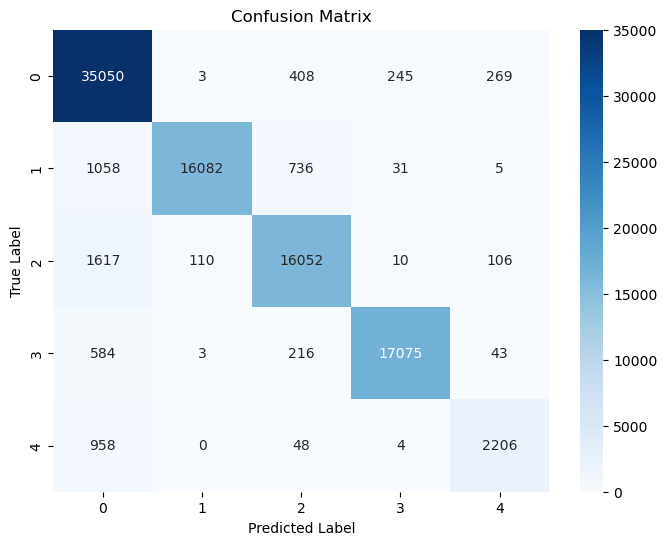

2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy for Fold 1: 0.9305

Starting training for Fold 2...
Training set size: 371673
Validation set size: 92919
Epoch 1/50


/Users/negin/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11611/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8609 - loss: 0.4374
Epoch 1: val_accuracy improved from inf to 0.96033, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 141s 12ms/step - accuracy: 0.8610 - loss: 0.4374 - val_accuracy: 0.9603 - val_loss: 0.1632 - learning_rate: 0.0050
Epoch 2/50
11614/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9431 - loss: 0.2208
Epoch 2: val_accuracy did not improve from 0.96033
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 138s 12ms/step - accuracy: 0.9431 - loss: 0.2208 - val_accuracy: 0.9622 - val_loss: 0.1485 - learning_rate: 0.0050
Epoch 3/50
11611/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9460 - loss: 0.2129
Epoch 3: val_accuracy improved from 0.96033 to 0.83516, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 138s 12ms/step - accuracy: 0.9460 - loss: 0.2129 - val_accuracy: 0.8352 - val_loss: 0.6751 - learning_rate: 0.0050
Epoch 4/50
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9453 - loss: 0.2127
Epoch 4: val_accuracy did not improve from 0.83516
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 137s 12ms/step - accuracy: 0.9453 - loss: 0.2127 - val_accuracy: 0.9645 - val_loss: 0.1422 - learning_rate: 0.0050
Epoch 5/50
11612/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9430 - loss: 0.2199
Epoch 5: val_accuracy did not improve from 0.83516
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 137s 12ms/step - accuracy: 0.9430 - loss: 0.2199 - val_accuracy: 0.9629 - val_loss: 0.1489 - learning_rate: 0.0050
Epoch 6/50
11612/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9379 - loss: 0.2347
Epoch 6: val_accuracy did not improve from 0.83516
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 140s 12ms/step - accuracy: 0.9379 - loss: 0.2347 - val_accuracy: 0.9616 - val_loss: 0.1580 - lear


Evaluating Fold 2...
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     35975
         1.0       0.66      0.90      0.76     17912
         2.0       0.89      0.90      0.90     17895
         3.0       0.94      0.52      0.67     17921
         4.0       0.91      0.38      0.54      3216

    accuracy                           0.84     92919
   macro avg       0.86      0.73      0.76     92919
weighted avg       0.86      0.84      0.83     92919



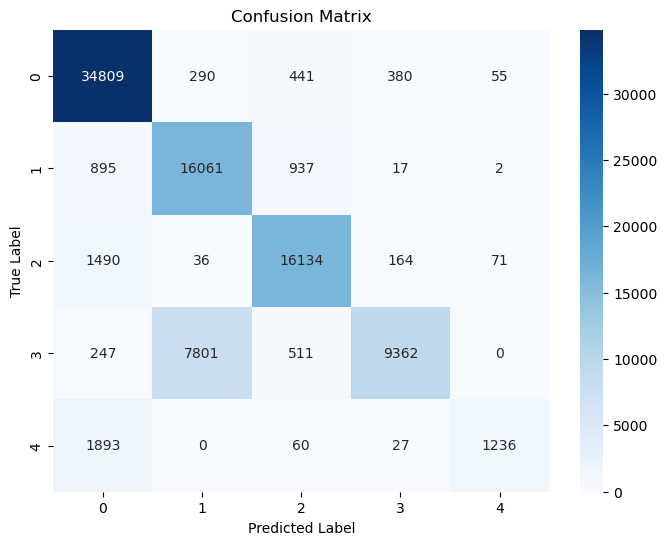

2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy for Fold 2: 0.8352

Starting training for Fold 3...
Training set size: 371674
Validation set size: 92918
Epoch 1/50


/Users/negin/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11614/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8559 - loss: 0.4514
Epoch 1: val_accuracy improved from inf to 0.61351, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 145s 12ms/step - accuracy: 0.8559 - loss: 0.4514 - val_accuracy: 0.6135 - val_loss: 1.7787 - learning_rate: 0.0050
Epoch 2/50
11613/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9263 - loss: 0.2733
Epoch 2: val_accuracy did not improve from 0.61351
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - accuracy: 0.9263 - loss: 0.2733 - val_accuracy: 0.8871 - val_loss: 0.3526 - learning_rate: 0.0050
Epoch 3/50
11612/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8796 - loss: 0.3895
Epoch 3: val_accuracy did not improve from 0.61351
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 145s 12ms/step - accuracy: 0.8796 - loss: 0.3895 - val_accuracy: 0.9547 - val_loss: 0.1867 - learning_rate: 0.0050
Epoch 4/50
11613/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9038 - loss: 0.3353
Epoch 4: val_accuracy did not improve from 0.61351
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 139s 12ms/step - accuracy: 0.9038 - loss: 0.3353 - val_accuracy: 0.8925 - val_loss: 0.3538 - lear


Evaluating Fold 3...
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.56      0.70     35976
         1.0       0.42      0.85      0.56     17912
         2.0       0.82      0.91      0.86     17894
         3.0       0.23      0.17      0.20     17921
         4.0       0.95      0.76      0.84      3215

    accuracy                           0.61     92918
   macro avg       0.67      0.65      0.63     92918
weighted avg       0.68      0.61      0.61     92918



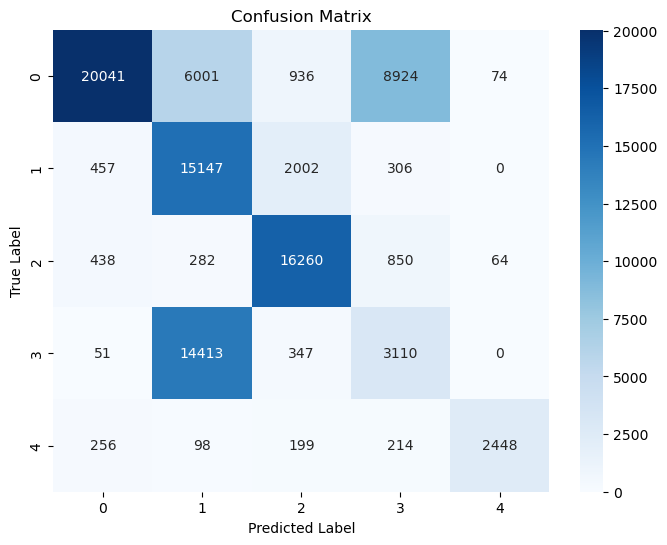

2904/2904 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Accuracy for Fold 3: 0.6135

Starting training for Fold 4...
Training set size: 371674
Validation set size: 92918
Epoch 1/50


/Users/negin/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11613/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8507 - loss: 0.4549
Epoch 1: val_accuracy improved from inf to 0.95810, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 150s 13ms/step - accuracy: 0.8507 - loss: 0.4549 - val_accuracy: 0.9581 - val_loss: 0.1706 - learning_rate: 0.0050
Epoch 2/50
11613/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9344 - loss: 0.2472
Epoch 2: val_accuracy did not improve from 0.95810
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - accuracy: 0.9344 - loss: 0.2472 - val_accuracy: 0.9621 - val_loss: 0.1446 - learning_rate: 0.0050
Epoch 3/50
11614/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9388 - loss: 0.2302
Epoch 3: val_accuracy did not improve from 0.95810
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 140s 12ms/step - accuracy: 0.9388 - loss: 0.2302 - val_accuracy: 0.9654 - val_loss: 0.1381 - learning_rate: 0.0050
Epoch 4/50
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9386 - loss: 0.2281
Epoch 4: val_accuracy improved from 0.95810 to 0.95727, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - accuracy: 0.9386 - loss: 0.2281 - val_accuracy: 0.9573 - val_loss: 0.1630 - learning_rate: 0.0050
Epoch 5/50
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9390 - loss: 0.2265
Epoch 5: val_accuracy improved from 0.95727 to 0.94986, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - accuracy: 0.9390 - loss: 0.2265 - val_accuracy: 0.9499 - val_loss: 0.1836 - learning_rate: 0.0050
Epoch 6/50
11611/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9184 - loss: 0.2878
Epoch 6: val_accuracy did not improve from 0.94986
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - accuracy: 0.9184 - loss: 0.2878 - val_accuracy: 0.9565 - val_loss: 0.1624 - learning_rate: 0.0050
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.



Evaluating Fold 4...
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     35976
         1.0       0.99      0.94      0.96     17911
         2.0       0.98      0.88      0.93     17894
         3.0       0.97      0.97      0.97     17922
         4.0       0.97      0.80      0.88      3215

    accuracy                           0.95     92918
   macro avg       0.96      0.92      0.94     92918
weighted avg       0.95      0.95      0.95     92918



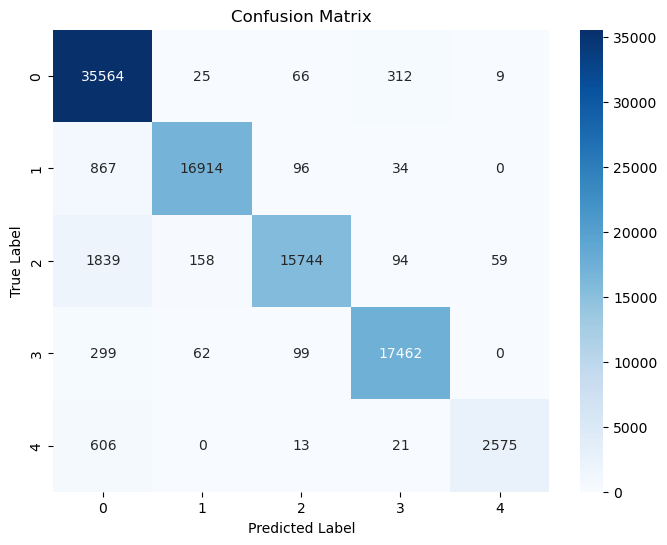

2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy for Fold 4: 0.9499

Starting training for Fold 5...
Training set size: 371674
Validation set size: 92918
Epoch 1/50


/Users/negin/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11613/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8513 - loss: 0.4606
Epoch 1: val_accuracy improved from inf to 0.53049, saving model to best_model.h5


11615/11615 ━━━━━━━━━━━━━━━━━━━━ 146s 12ms/step - accuracy: 0.8513 - loss: 0.4606 - val_accuracy: 0.5305 - val_loss: 1.9791 - learning_rate: 0.0050
Epoch 2/50
11611/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9337 - loss: 0.2499
Epoch 2: val_accuracy did not improve from 0.53049
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 146s 13ms/step - accuracy: 0.9337 - loss: 0.2499 - val_accuracy: 0.9527 - val_loss: 0.1898 - learning_rate: 0.0050
Epoch 3/50
11612/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9213 - loss: 0.2814
Epoch 3: val_accuracy did not improve from 0.53049
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 146s 13ms/step - accuracy: 0.9213 - loss: 0.2814 - val_accuracy: 0.8987 - val_loss: 0.3904 - learning_rate: 0.0050
Epoch 4/50
11614/11615 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9063 - loss: 0.3264
Epoch 4: val_accuracy did not improve from 0.53049
11615/11615 ━━━━━━━━━━━━━━━━━━━━ 148s 13ms/step - accuracy: 0.9063 - loss: 0.3264 - val_accuracy: 0.9557 - val_loss: 0.1800 - lear

11615/11615 ━━━━━━━━━━━━━━━━━━━━ 149s 13ms/step - accuracy: 0.6226 - loss: 0.9802 - val_accuracy: 0.5248 - val_loss: 1.2720 - learning_rate: 0.0050
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.



Evaluating Fold 5...
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56     35976
         1.0       0.50      0.61      0.55     17911
         2.0       0.38      0.41      0.40     17894
         3.0       0.63      0.60      0.61     17921
         4.0       0.00      0.00      0.00      3216

    accuracy                           0.52     92918
   macro avg       0.42      0.43      0.42     92918
weighted avg       0.51      0.52      0.52     92918



/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


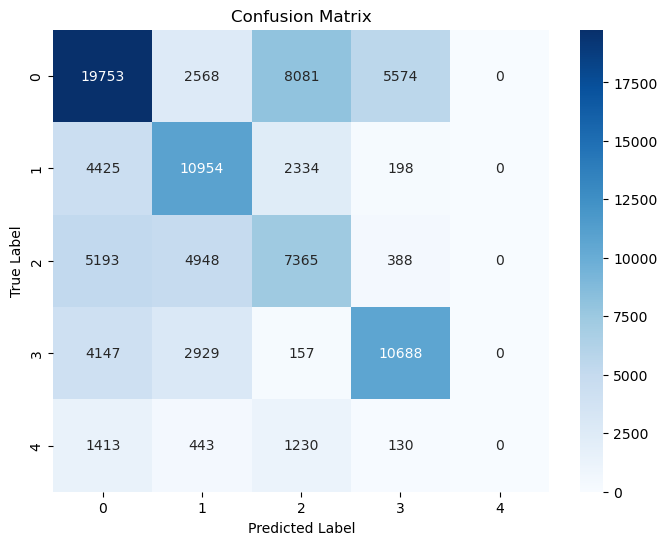

2904/2904 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy for Fold 5: 0.5248


/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
for train_index, val_index in kf.split(X_combined, y_combined):
    print(f"\nStarting training for Fold {fold_number}...")
    
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_combined[train_index], X_combined[val_index]
    y_train_fold, y_val_fold = y_combined[train_index], y_combined[val_index]
    
    print(f"Training set size: {X_train_fold.shape[0]}")
    print(f"Validation set size: {X_val_fold.shape[0]}")


# Initialize the CNN + LSTM model
    model = CNNLSTMClassifier(
        input_shape=(187, 1),  # The input shape is already correctly set
        num_classes=len(np.unique(y_combined)),
        learning_rate=5e-3,
        batch_size=32,
        epochs=50
    )
    
    # Train the model with the combined data
    model.fit(X_train_fold, y_train_fold, X_val_fold, y_val_fold)
    
    # Evaluate the model using the class's evaluate method
    print(f"\nEvaluating Fold {fold_number}...")
    model.evaluate(X_val_fold, y_val_fold)
    
    # Load the best model to make predictions
    best_model = keras.models.load_model('best_model.h5')
    
    # Predict on the validation set using the best model
    y_val_pred = best_model.predict(X_val_fold)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val_fold, y_val_pred_classes)
    accuracy_scores.append(accuracy)
    
    print(f"Accuracy for Fold {fold_number}: {accuracy:.4f}")
    
    # Generate classification report and confusion matrix
    classification_reports.append(classification_report(y_val_fold, y_val_pred_classes, digits=4))
    confusion_matrices.append(confusion_matrix(y_val_fold, y_val_pred_classes))
    
    fold_number += 1

## Plot 

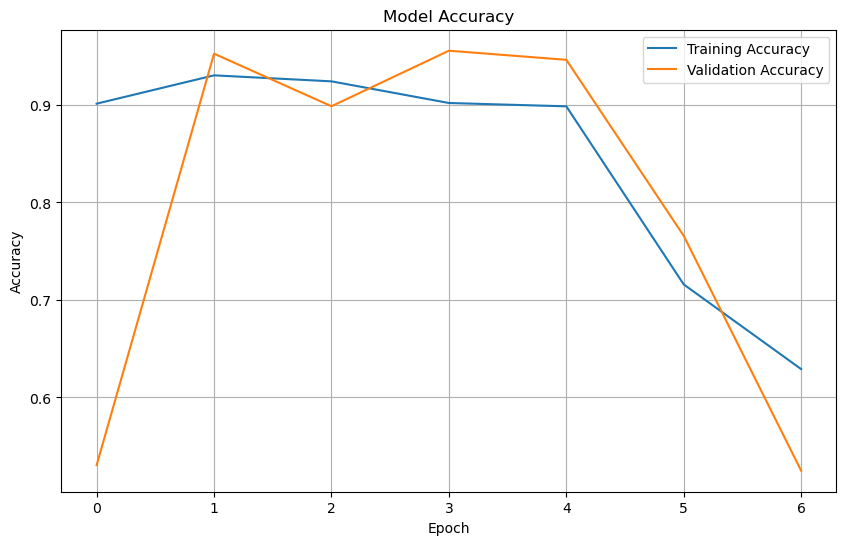

In [38]:
model.plot_history()

## test set

Test set shape: (162, 187, 1)
Test labels shape: (162,)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0     0.2158    0.9375    0.3509        32
         1.0     0.2857    0.1818    0.2222        33
         2.0     0.0000    0.0000    0.0000        32
         3.0     0.0000    0.0000    0.0000        32
         4.0     0.0000    0.0000    0.0000        33

    accuracy                         0.2222       162
   macro avg     0.1003    0.2239    0.1146       162
weighted avg     0.1008    0.2222    0.1146       162

Accuracy on Test Set: 0.2222


/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


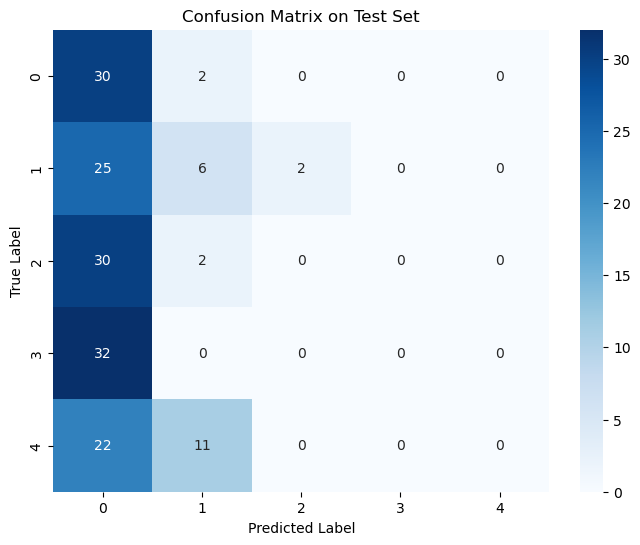

In [39]:
#%% evlauate the model with the test set

# Ensure the test data has the correct shape
X_test = np.expand_dims(X_test.values, axis=-1)  # Add channel dimension if not already added
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


from tensorflow import keras

# Load the best model weights
best_model = keras.models.load_model('best_model.h5')

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on the test set
y_test_pred = best_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Generate classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_classes, digits=4))

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_classes)
print(f"Accuracy on Test Set: {test_accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

Prepared holdout set shape for augmentation: (163, 187, 1)
Noisy holdout set shape: (163, 187, 1)
Noisy holdout labels shape: (163,)

Evaluating on the Noisy Holdout Set...


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Noisy Holdout Set Accuracy: 0.2147

Classification Report for Noisy Holdout Set:
              precision    recall  f1-score   support

         0.0     0.2302    0.9697    0.3721        33
         1.0     0.1500    0.0938    0.1154        32
         2.0     0.0000    0.0000    0.0000        33
         3.0     0.0000    0.0000    0.0000        33
         4.0     0.0000    0.0000    0.0000        32

    accuracy                         0.2147       163
   macro avg     0.0760    0.2127    0.0975       163
weighted avg     0.0761    0.2147    0.0980       163



/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/negin/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


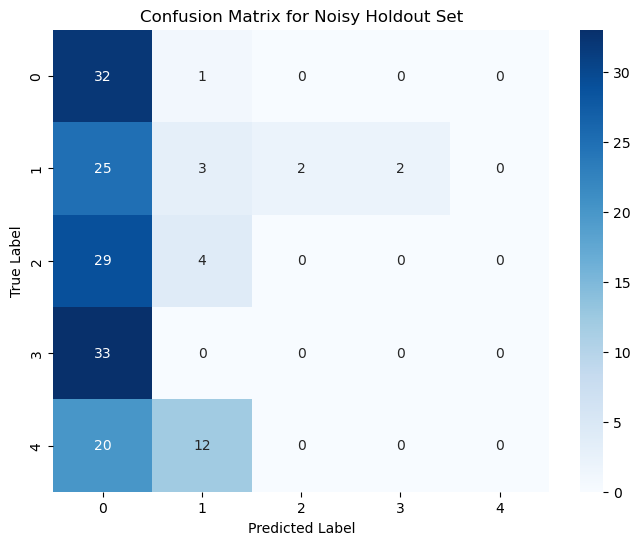

In [40]:
import numpy as np
from data_augmentation import DataAugmentation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# Initialize the Data Augmentation class for noise injection
augmenter = DataAugmentation(
    shift_max=0,       # No time shift
    noise_level=0.1,   # Introduce significant noise
    scale_range=(1.0, 1.0), # No scaling
    expected_length=187
)

# 🆕 Prepare holdout data with the channel dimension for augmentation
X_holdout_prepared = np.expand_dims(X_holdout.values, axis=-1)  # Shape should be (samples, 187, 1)
y_holdout = y_holdout.values

#%%
print(f"Prepared holdout set shape for augmentation: {X_holdout_prepared.shape}")

# Apply noise to the holdout set with an augmentation factor of 1 (100% of samples)
X_holdout_noisy = augmenter.augment_batch(X_holdout_prepared, augmentation_factor=1.0)

# 🆕 Set the labels for the augmented noisy holdout set
num_original_samples = len(y_holdout)
num_augmented_samples = X_holdout_noisy.shape[0]

# Generate the correct number of labels for the augmented samples
y_holdout_noisy = np.repeat(y_holdout, np.ceil(num_augmented_samples / num_original_samples).astype(int))[:num_augmented_samples]

print(f"Noisy holdout set shape: {X_holdout_noisy.shape}")
print(f"Noisy holdout labels shape: {y_holdout_noisy.shape}")

# Load the best model
model = keras.models.load_model('best_model.h5')

# Evaluate on the noisy holdout set
print("\nEvaluating on the Noisy Holdout Set...")
y_holdout_pred = model.predict(X_holdout_noisy)
y_holdout_pred_classes = np.argmax(y_holdout_pred, axis=1)

# Calculate accuracy for the noisy holdout set
holdout_accuracy = accuracy_score(y_holdout_noisy, y_holdout_pred_classes)
print(f"Noisy Holdout Set Accuracy: {holdout_accuracy:.4f}")

# Generate classification report for the noisy holdout set
print("\nClassification Report for Noisy Holdout Set:")
print(classification_report(y_holdout_noisy, y_holdout_pred_classes, digits=4))

# Generate confusion matrix for the noisy holdout set
conf_matrix_holdout = confusion_matrix(y_holdout_noisy, y_holdout_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_holdout, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Noisy Holdout Set')
plt.show()